<a href="https://colab.research.google.com/github/dong-young943/Bigdata-analysis/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC_%EB%8C%80%EA%B5%AC%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%99%9C%EC%9A%A9%EC%84%BC%ED%84%B0_%EA%B8%B0%EC%B6%9C_%EC%9E%91%EC%97%85%ED%98%95_%EC%9C%A0%ED%98%95_1_%EB%AC%B8%EC%A0%9C(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 빅데이터분석기사 대구빅데이터활용센터 기출
## 작업형 유형 1 문제(3)
#### 통계 기법(IQR) 방식의 이상치 제거
- orbital_period열의 이상치를 IQR 기법으로 제거하여
- 이상치들의 합을 계산
- 최종 결과만 print 출력
###### seaborn 라이브러리 로드

In [ ]:
import seaborn as sns

###### 'planets' 데이터 활용

In [ ]:
sns.get_dataset_names()
df = sns.load_dataset('planets')
df.head

<bound method NDFrame.head of                method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]>

###### IQR 산식은 참고 바람
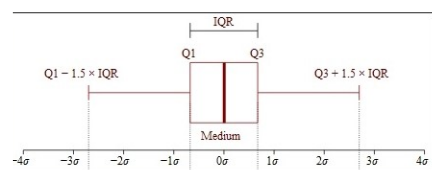
###### 먼저 1사분위, 3사분위를 계산하여 Q25, Q75변수에 할당

In [ ]:
Q25=df['orbital_period'].quantile(0.25)
Q75=df['orbital_period'].quantile(0.75)

###### 두번째로 Q75에서 Q25를 제외하여 IQR을 산정

In [ ]:
IQR = Q75 - Q25
IQR

520.5624595

###### 최소값, 최대값을 산정

In [ ]:
min=Q25-IQR*1.5
max=Q75+IQR*1.5
print('최소값은 ',min)
print('최대값은 ',max)

최소값은  -775.4011487500002
최대값은  1306.84868925


###### orbital_period열의 최소보다 작고, 최대보다 큰 데이터를 추출하여 df_outlier 변수에 할당

In [ ]:
df_outlier = df[(df['orbital_period']<=min)|(df['orbital_period']>=max)]

###### df_outlier의 orbital_period열의 합계를 print함수로 출력
###### python에서 or은 |, and는 & 논리연산자 사용

In [ ]:
print(df_outlier['orbital_period'].sum())

1818772.582
